Day 2/3:

- Overview of Machine Learning (Lecture)
- Simple Regression dataset - step through ML workflow (Workshop)

![image](https://files.slack.com/files-pri/TC7S0MN8P-FC8V688ER/image_from_ios.jpg)

![image](https://files.slack.com/files-pri/TC7S0MN8P-FC8R1BW10/image_from_ios.jpg)

![day3](https://files.slack.com/files-pri/TC7S0MN8P-FC9DRA1FU/image_from_ios.jpg)

## Workflow

1. Data engineering
2. Feature engineering
3. Shuffle, split train/test
4. Select, configure, fit model
5. Predict
6. Evaluate

Dataset
- https://archive.ics.uci.edu/ml/datasets/auto+mpg
- Multivariate = more than 1 FEATURE / attribute / input
- Instances: 398 (very small)
- Attribute Characteristics:
    Categorical: fixed number of values [0, 1], [0, 1, 2], [2, 3, 4]
    Real: real number
- Number of Attributes: 8
- Missing Values? Yes (may need to dropna, or interpolate)


Problem Formulation:
- Given data about a car
- Predict its miles per gallon (a real number )  => Regression Problem
- Metric: How accurate is the prediction from the ground truth

Actual metric: Mean Squared Error

$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$$

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/auto-mpg/auto-mpg.data.txt', sep='\s+',
                names=['mpg', 'cylinders', 'displacement',
                       'horsepower', 'weight', 'acceleration', 'model_year',
                       'origin', 'car_name'],
                header=None,
                na_values=['?'])

# Attribute Information:
#    1. mpg:           continuous
#    2. cylinders:     multi-valued discrete
#    3. displacement:  continuous
#    4. horsepower:    continuous
#    5. weight:        continuous
#    6. acceleration:  continuous
#    7. model year:    multi-valued discrete
#    8. origin:        multi-valued discrete
#    9. car name:      string (mostly unique for each instance)

# axis=1 drop columns
# axis=0 [default] drop rows
# inplace=True changes original df
# inplace=False returns a copy of the df
df.drop(['car_name'], axis=1, inplace=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [4]:
df2 = df.drop(df[df.cylinders == 8].index)
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
14,24.0,4,113.0,95.0,2372.0,15.0,70,3
15,22.0,6,198.0,95.0,2833.0,15.5,70,1
16,18.0,6,199.0,97.0,2774.0,15.5,70,1
17,21.0,6,200.0,85.0,2587.0,16.0,70,1
18,27.0,4,97.0,88.0,2130.0,14.5,70,3
19,26.0,4,97.0,46.0,1835.0,20.5,70,2
20,25.0,4,110.0,87.0,2672.0,17.5,70,2
21,24.0,4,107.0,90.0,2430.0,14.5,70,2
22,25.0,4,104.0,95.0,2375.0,17.5,70,2
23,26.0,4,121.0,113.0,2234.0,12.5,70,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
# One way to print na rows
df[df.isna().values]

# df.isna().values returns a mask
# apply mask to original dataframe

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [7]:
# NaN values

# - drop  =>  dropna()
# - interpolate => interpolate()
# - fill with same value (mean, median, ...) => fillna()

In [8]:
df1 = df.dropna()

df2 = df.interpolate()

df3 = df.fillna(0)

In [9]:
index = df[df.isna().values].index

# original
df.iloc[index] # iloc integer column, else use loc 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [10]:
df1 = df.dropna()

# KeyError: "None of [Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')] are in the [index]"
# df1.loc[index] # rows are gone!!!

In [11]:
df2 = df.interpolate()
df2.iloc[index] # linear interpolation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,97.5,2046.0,19.0,71,1
126,21.0,6,200.0,97.5,2875.0,17.0,74,1
330,40.9,4,85.0,67.0,1835.0,17.3,80,2
336,23.6,4,140.0,80.0,2905.0,14.3,80,1
354,34.5,4,100.0,74.5,2320.0,15.8,81,2
374,23.0,4,151.0,83.0,3035.0,20.5,82,1


In [18]:
df2.iloc[30:35] # see the interpolation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
30,28.0,4,140.0,90.0,2264.0,15.5,71,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,3
32,25.0,4,98.0,97.5,2046.0,19.0,71,1
33,19.0,6,232.0,100.0,2634.0,13.0,71,1
34,16.0,6,225.0,105.0,3439.0,15.5,71,1


In [19]:
import numpy as np
df3 = df.fillna(np.mean(df.horsepower))
df3.iloc[index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
33,19.0,6,232.0,100.0,2634.0,13.0,71,1
128,15.0,6,250.0,100.0,3336.0,17.0,74,1
333,32.7,6,168.0,132.0,2910.0,11.4,80,3
340,25.8,4,156.0,92.0,2620.0,14.4,81,1
359,28.1,4,141.0,80.0,3230.0,20.4,81,2
380,36.0,4,120.0,88.0,2160.0,14.5,82,3


In [20]:
# Drop NaN values because horsepower interpolation between different
# car models requires work (future enhancement)

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [21]:
df.corr?

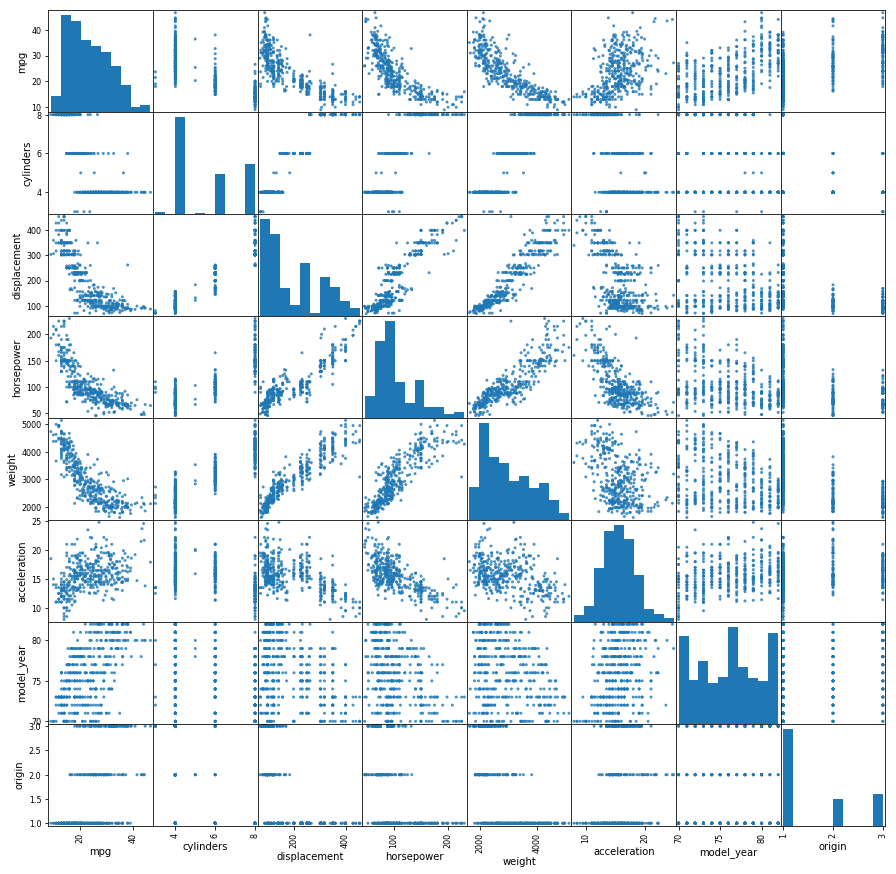

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model_year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

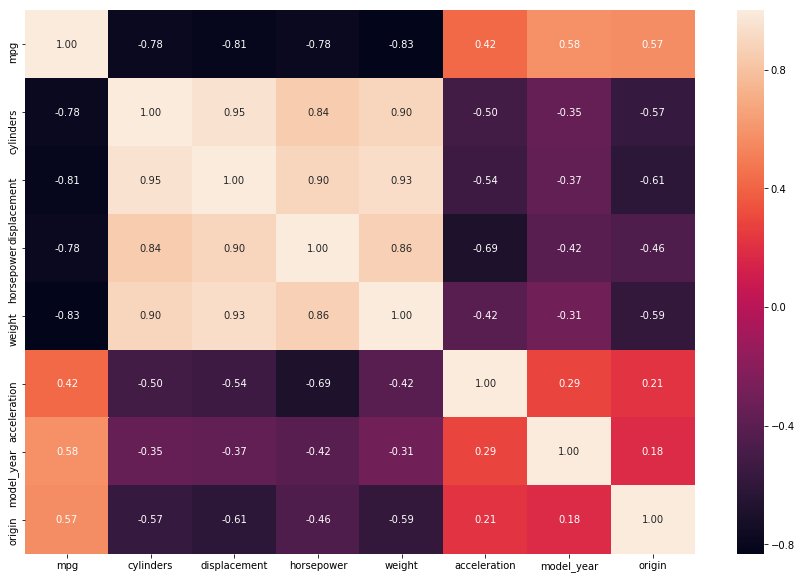

In [31]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

scatter_matrix(df, alpha=0.8, figsize=(15, 15))
plt.show()

# show correlations
print(df.corr())

# another way to plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.heatmap(df.corr(), ax=axes, annot=True, fmt='.2f')

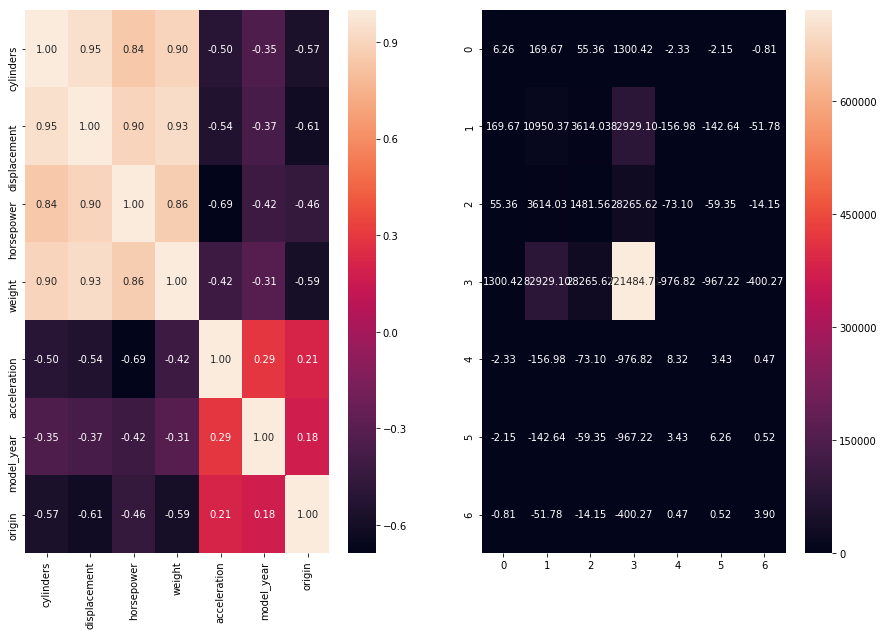

In [32]:
# feature engineering => reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X = df.loc[:, df.columns != 'mpg']
Z = pca.fit_transform(X)

#pca.components_ # eigenvectors, sorted by top 3 eigenvalues

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.heatmap(X.corr(), ax=axes[0], annot=True, fmt='.2f')
sns.heatmap(pca.get_covariance(), ax=axes[1], annot=True, fmt='.2f')

In [33]:
print(pca.explained_variance_ratio_)

[9.97561506e-01 2.06279691e-03 3.55947852e-04]


![image](https://files.slack.com/files-pri/TC7S0MN8P-FC838KEAU/image_from_ios.jpg)

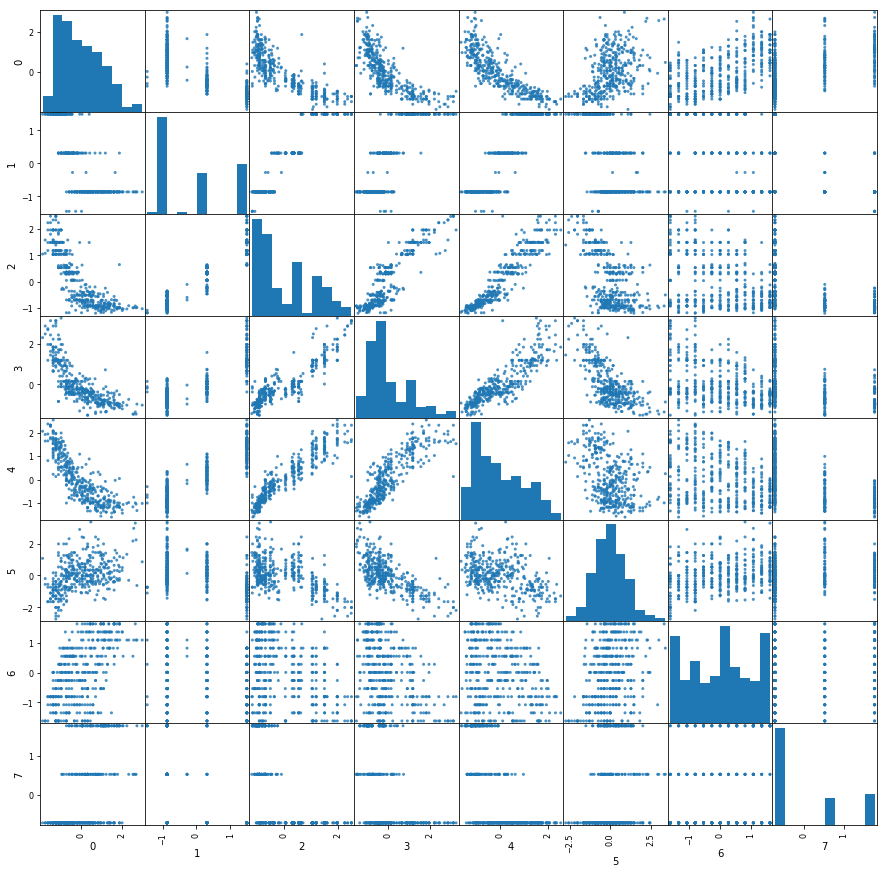

In [92]:
# Normalize (scale the features to similar ranges)
# replot scatter matrix to see any changes

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df))

scatter_matrix(df_scaled, alpha=.8, figsize=(15, 15))
plt.show()

# print(scaler.mean_) # mean per feature
# print(scaler.scale_) # std dev per feature

In [9]:
# Encode model_year(?)
# Don't actually encode if we want to predict later than 1982

# inspect unique values
print(df.model_year.unique())

# inspect min, max
print(df.model_year.describe())

[70 71 72 73 74 75 76 77 78 79 80 81 82]
count    392.000000
mean      75.979592
std        3.683737
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64


In [105]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
le.fit(df.model_year)
df['model_year_enc'] = le.transform(df.model_year) # add to dataframe

oe = OneHotEncoder()

# Expected 2D array, got 1D array instead
# df.model_year.values = [70, 70, ....]
# df.model_year.values.reshape(-1, 1) = [[70], [70], ...]
oe.fit(df.model_year.values.reshape(-1, 1))

# can't just assign to 1 column because this is a matrix
model_year_onehot = oe.transform(df.model_year.values.reshape(-1, 1))
model_year_onehot.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [101]:
df.loc[:, ['model_year', 'model_year_enc']] # compare label encoded

,model_year,model_year_enc
0,70,0
1,70,0
2,70,0
3,70,0
4,70,0
5,70,0
6,70,0
7,70,0
8,70,0
9,70,0


In [109]:
# create a dataframe around the one-hot encoded columns
# share the same index as original dataframe
pd.DataFrame(model_year_onehot.todense(), index=df.index)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
# share the same index as original dataframe
df_onehot = pd.DataFrame(model_year_onehot.todense(), index=df.index)

df2 = pd.concat([df, df_onehot], axis=1) # axis=1 concat columns
                                         # axis=0 concat rows
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 22 columns):
mpg               392 non-null float64
cylinders         392 non-null int64
displacement      392 non-null float64
horsepower        392 non-null float64
weight            392 non-null float64
acceleration      392 non-null float64
model_year        392 non-null int64
origin            392 non-null int64
model_year_enc    392 non-null int64
0                 392 non-null float64
1                 392 non-null float64
2                 392 non-null float64
3                 392 non-null float64
4                 392 non-null float64
5                 392 non-null float64
6                 392 non-null float64
7                 392 non-null float64
8                 392 non-null float64
9                 392 non-null float64
10                392 non-null float64
11                392 non-null float64
12                392 non-null float64
dtypes: float64(18), int64(4)
memory usage: 7

In [116]:
# one-line to do one-hot (also saves memories)

df3 = pd.concat([df, pd.get_dummies(df.model_year)], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 22 columns):
mpg               392 non-null float64
cylinders         392 non-null int64
displacement      392 non-null float64
horsepower        392 non-null float64
weight            392 non-null float64
acceleration      392 non-null float64
model_year        392 non-null int64
origin            392 non-null int64
model_year_enc    392 non-null int64
70                392 non-null uint8
71                392 non-null uint8
72                392 non-null uint8
73                392 non-null uint8
74                392 non-null uint8
75                392 non-null uint8
76                392 non-null uint8
77                392 non-null uint8
78                392 non-null uint8
79                392 non-null uint8
80                392 non-null uint8
81                392 non-null uint8
82                392 non-null uint8
dtypes: float64(5), int64(4), uint8(13)
memory usage: 35.6 KB


In [11]:
# Exercise
# 1. Run LabelEncode example on df.model_year
# 2. Print the classes, transform, inverse_transform
# 3. Post on slack
le = LabelEncoder()
transformed = le.fit_transform(df.model_year)
print(transformed)

# reverse
reverse = le.inverse_transform(transformed)
print(reverse)

# override
# df.model_year = transformed

# append as new column
df['model_year_enc'] = transformed
df

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,model_year_enc
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,0
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,0
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,0
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,0
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,0


In [12]:
# feature selection

# select cylinders to model_year
# loc[row_selector, col_selector]
X = df.loc[:, 'cylinders':'model_year'] # contiguous columns
y = df.mpg

X.columns # verify columns are correct

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

In [13]:
# Example: non-contiguous columns (skip something in middle)
# skip mpg, weight, origin, model_year_enc
df.loc[:, (df.columns != 'mpg') & (df.columns != 'weight') &
          (df.columns != 'origin') & (df.columns != 'model_year_enc')]

,cylinders,displacement,horsepower,acceleration,model_year
0,8,307.0,130.0,12.0,70
1,8,350.0,165.0,11.5,70
2,8,318.0,150.0,11.0,70
3,8,304.0,150.0,12.0,70
4,8,302.0,140.0,10.5,70
5,8,429.0,198.0,10.0,70
6,8,454.0,220.0,9.0,70
7,8,440.0,215.0,8.5,70
8,8,455.0,225.0,10.0,70
9,8,390.0,190.0,8.5,70


In [14]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'model_year_enc'],
      dtype='object')

In [15]:
# Train/test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # split 75/25

In [16]:
print(X_train[:5])

     cylinders  displacement  horsepower  weight  acceleration  model_year
267          4         134.0        95.0  2560.0          14.2          78
16           6         199.0        97.0  2774.0          15.5          70
67           8         429.0       208.0  4633.0          11.0          72
160          6         231.0       110.0  3907.0          21.0          75
7            8         440.0       215.0  4312.0           8.5          70


In [17]:
print(X_test.shape)

(98, 6)


In [18]:
# Scale X_train, X_test, y_train, y_test
from sklearn.preprocessing import StandardScaler

# Scaling both so that Mean Squared Error / Cost computes small numbers
# (better for training)
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# initialise and transform y_train
# reshape vector: from (294,) to (294, 1)
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Exercise:
# 1. Scale X (X_train, X_test)
# 2. Retrain SGD with X_train_scaled, y_train_scaled
# 3. post results (code + training results) on Slack
X_train_scaled = X_scaler.fit_transform(X_train) # (294, 6) ok (matrix)
X_test_scaled = X_scaler.transform(X_test)
print(y_train_scaled)

[[ 4.76114146e-01]
 [-7.11725791e-01]
 [-1.58697627e+00]
 [-8.36761573e-01]
 [-1.21186892e+00]
 [ 2.88560471e-01]
 [ 1.31385389e+00]
 [ 1.33886105e+00]
 [ 1.42638609e+00]
 [-4.61654225e-01]
 [-2.11582660e-01]
 [-6.86718634e-01]
 [ 1.03877517e+00]
 [ 1.02627159e+00]
 [-3.36618442e-01]
 [-2.11582660e-01]
 [ 1.68896124e+00]
 [ 1.15130737e+00]
 [-5.36675695e-01]
 [-1.08683314e+00]
 [-2.11582660e-01]
 [-3.36618442e-01]
 [ 1.66395408e+00]
 [-3.36618442e-01]
 [-1.08683314e+00]
 [ 9.13739385e-01]
 [-8.65468768e-02]
 [ 1.01006797e-01]
 [ 6.63667820e-01]
 [ 8.51221494e-01]
 [-1.08683314e+00]
 [ 1.37637178e+00]
 [ 4.13596254e-01]
 [ 5.38632037e-01]
 [-5.86690008e-01]
 [ 2.22661510e+00]
 [-7.74243682e-01]
 [ 6.63667820e-01]
 [ 2.88560471e-01]
 [ 1.01376801e+00]
 [-7.11725791e-01]
 [-8.99279465e-01]
 [-1.33690470e+00]
 [-5.86690008e-01]
 [ 7.88703603e-01]
 [-4.61654225e-01]
 [-5.86690008e-01]
 [ 4.13596254e-01]
 [-8.65468768e-02]
 [-1.21186892e+00]
 [-3.86632755e-01]
 [ 5.26128459e-01]
 [-1.0868331

In [54]:
from sklearn.linear_model import SGDRegressor

# Stochastic Gradient Descent Regressor
model = SGDRegressor(random_state=42, verbose=True, tol=1e-4, max_iter=100,
                     eta0=0.001, learning_rate='invscaling')
    
model.fit(X_train_scaled, y_train_scaled.ravel()) # fit / train
model.score(X_test_scaled, y_test_scaled.ravel()) # evaluate with test set

-- Epoch 1
Norm: 0.13, NNZs: 6, Bias: 0.000436, T: 294, Avg. loss: 0.377156
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 6, Bias: 0.000457, T: 588, Avg. loss: 0.261912
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 6, Bias: 0.000441, T: 882, Avg. loss: 0.208425
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 6, Bias: 0.000358, T: 1176, Avg. loss: 0.178347
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.31, NNZs: 6, Bias: 0.000309, T: 1470, Avg. loss: 0.160037
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.33, NNZs: 6, Bias: 0.000315, T: 1764, Avg. loss: 0.148166
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.35, NNZs: 6, Bias: 0.000302, T: 2058, Avg. loss: 0.140144
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.36, NNZs: 6, Bias: 0.000292, T: 2352, Avg. loss: 0.134497
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.37, NNZs: 6, Bias: 0.000317, T: 2646, Avg. loss: 0.130428
Total training time: 0.00 seco

0.7656041128533675

In [20]:
print(model.score(X_test_scaled, y_test_scaled))
print(model.coef_)
print(model.intercept_)

0.7820154948794282
[-0.10523612 -0.1452066  -0.12920592 -0.38262518 -0.05863427  0.31848574]
[-0.00067191]


In [35]:
learning_curve?

In [37]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores, val_scores = learning_curve(
    SGDRegressor(random_state=42, verbose=True, tol=1e-4, max_iter=100,
                 learning_rate='constant', eta0=1e-4), # default is 0.01
    X_train_scaled, y_train_scaled.ravel(),
    cv=10,
    random_state=42,
    verbose=True)

[learning_curve] Training set sizes: [ 26  85 145 204 264]
-- Epoch 1
Norm: 0.00, NNZs: 6, Bias: -0.000206, T: 26, Avg. loss: 0.422346
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 6, Bias: -0.000412, T: 52, Avg. loss: 0.416554
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 6, Bias: -0.000619, T: 78, Avg. loss: 0.410889
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 6, Bias: -0.000824, T: 104, Avg. loss: 0.405344
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 6, Bias: -0.001032, T: 130, Avg. loss: 0.399921
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 6, Bias: -0.001239, T: 156, Avg. loss: 0.394611
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.03, NNZs: 6, Bias: -0.001448, T: 182, Avg. loss: 0.389415
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.03, NNZs: 6, Bias: -0.001656, T: 208, Avg. loss: 0.384329
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.03, NNZs: 6, Bias: -0.001865,

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.13 seconds.
-- Epoch 67
Norm: 0.43, NNZs: 6, Bias: -0.000793, T: 13668, Avg. loss: 0.118741
Total training time: 0.13 seconds.
-- Epoch 68
Norm: 0.44, NNZs: 6, Bias: -0.000655, T: 13872, Avg. loss: 0.118619
Total training time: 0.13 seconds.
-- Epoch 69
Norm: 0.44, NNZs: 6, Bias: -0.000518, T: 14076, Avg. loss: 0.118498
Total training time: 0.13 seconds.
-- Epoch 70
Norm: 0.44, NNZs: 6, Bias: -0.000386, T: 14280, Avg. loss: 0.118383
Total training time: 0.13 seconds.
-- Epoch 71
Norm: 0.44, NNZs: 6, Bias: -0.000250, T: 14484, Avg. loss: 0.118268
Total training time: 0.13 seconds.
-- Epoch 72
Norm: 0.44, NNZs: 6, Bias: -0.000117, T: 14688, Avg. loss: 0.118156
Total training time: 0.13 seconds.
-- Epoch 73
Norm: 0.44, NNZs: 6, Bias: 0.000008, T: 14892, Avg. loss: 0.118046
Total training time: 0.14 seconds.
-- Epoch 74
Norm: 0.44, NNZs: 6, Bias: 0.000132, T: 15096, Avg. loss: 0.117938
Total training time: 0.14 seconds.
-- Epoch 75
Norm: 0.44, NNZs: 6, Bias: 0.00024

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.10 seconds.
-- Epoch 41
Norm: 0.40, NNZs: 6, Bias: -0.000068, T: 5945, Avg. loss: 0.140495
Total training time: 0.10 seconds.
-- Epoch 42
Norm: 0.40, NNZs: 6, Bias: -0.000004, T: 6090, Avg. loss: 0.139962
Total training time: 0.10 seconds.
-- Epoch 43
Norm: 0.40, NNZs: 6, Bias: 0.000059, T: 6235, Avg. loss: 0.139461
Total training time: 0.10 seconds.
-- Epoch 44
Norm: 0.40, NNZs: 6, Bias: 0.000123, T: 6380, Avg. loss: 0.138991
Total training time: 0.10 seconds.
-- Epoch 45
Norm: 0.41, NNZs: 6, Bias: 0.000185, T: 6525, Avg. loss: 0.138549
Total training time: 0.10 seconds.
-- Epoch 46
Norm: 0.41, NNZs: 6, Bias: 0.000240, T: 6670, Avg. loss: 0.138133
Total training time: 0.10 seconds.
-- Epoch 47
Norm: 0.41, NNZs: 6, Bias: 0.000301, T: 6815, Avg. loss: 0.137737
Total training time: 0.10 seconds.
-- Epoch 48
Norm: 0.41, NNZs: 6, Bias: 0.000359, T: 6960, Avg. loss: 0.137361
Total training time: 0.10 seconds.
-- Epoch 49
Norm: 0.41, NNZs: 6, Bias: 0.000417, T: 7105, 

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Norm: 0.37, NNZs: 6, Bias: -0.011236, T: 6715, Avg. loss: 0.123632
Total training time: 0.06 seconds.
-- Epoch 80
Norm: 0.38, NNZs: 6, Bias: -0.011608, T: 6800, Avg. loss: 0.123238
Total training time: 0.06 seconds.
-- Epoch 81
Norm: 0.38, NNZs: 6, Bias: -0.011980, T: 6885, Avg. loss: 0.122852
Total training time: 0.06 seconds.
-- Epoch 82
Norm: 0.38, NNZs: 6, Bias: -0.012350, T: 6970, Avg. loss: 0.122475
Total training time: 0.06 seconds.
-- Epoch 83
Norm: 0.38, NNZs: 6, Bias: -0.012718, T: 7055, Avg. loss: 0.122106
Total training time: 0.06 seconds.
-- Epoch 84
Norm: 0.38, NNZs: 6, Bias: -0.013088, T: 7140, Avg. loss: 0.121744
Total training time: 0.06 seconds.
-- Epoch 85
Norm: 0.38, NNZs: 6, Bias: -0.013456, T: 7225, Avg. loss: 0.121390
Total training time: 0.06 seconds.
-- Epoch 86
Norm: 0.38, NNZs: 6, Bias: -0.013822, T: 7310, Avg. loss: 0.121043
Total training time: 0.06 seconds.
-- Epoch 87
Norm: 0.39, NNZs: 6, Bias: -0.014189, T: 7395, Avg. loss: 0.120703
Total training time: 

-- Epoch 61
Norm: 0.47, NNZs: 6, Bias: 0.000832, T: 16104, Avg. loss: 0.106007
Total training time: 0.18 seconds.
-- Epoch 62
Norm: 0.47, NNZs: 6, Bias: 0.000786, T: 16368, Avg. loss: 0.105821
Total training time: 0.18 seconds.
-- Epoch 63
Norm: 0.47, NNZs: 6, Bias: 0.000740, T: 16632, Avg. loss: 0.105646
Total training time: 0.18 seconds.
-- Epoch 64
Norm: 0.47, NNZs: 6, Bias: 0.000696, T: 16896, Avg. loss: 0.105474
Total training time: 0.18 seconds.
-- Epoch 65
Norm: 0.47, NNZs: 6, Bias: 0.000645, T: 17160, Avg. loss: 0.105308
Total training time: 0.18 seconds.
-- Epoch 66
Norm: 0.48, NNZs: 6, Bias: 0.000596, T: 17424, Avg. loss: 0.105146
Total training time: 0.18 seconds.
-- Epoch 67
Norm: 0.48, NNZs: 6, Bias: 0.000555, T: 17688, Avg. loss: 0.104989
Total training time: 0.18 seconds.
-- Epoch 68
Norm: 0.48, NNZs: 6, Bias: 0.000505, T: 17952, Avg. loss: 0.104835
Total training time: 0.18 seconds.
-- Epoch 69
Norm: 0.48, NNZs: 6, Bias: 0.000471, T: 18216, Avg. loss: 0.104687
Total tra

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



-- Epoch 43
Norm: 0.33, NNZs: 6, Bias: -0.008294, T: 3655, Avg. loss: 0.141881
Total training time: 0.21 seconds.
-- Epoch 44
Norm: 0.33, NNZs: 6, Bias: -0.008561, T: 3740, Avg. loss: 0.140491
Total training time: 0.21 seconds.
-- Epoch 45
Norm: 0.33, NNZs: 6, Bias: -0.008828, T: 3825, Avg. loss: 0.139176
Total training time: 0.21 seconds.
-- Epoch 46
Norm: 0.33, NNZs: 6, Bias: -0.009098, T: 3910, Avg. loss: 0.137929
Total training time: 0.21 seconds.
-- Epoch 47
Norm: 0.34, NNZs: 6, Bias: -0.009362, T: 3995, Avg. loss: 0.136749
Total training time: 0.21 seconds.
-- Epoch 48
Norm: 0.34, NNZs: 6, Bias: -0.009628, T: 4080, Avg. loss: 0.135625
Total training time: 0.21 seconds.
-- Epoch 49
Norm: 0.34, NNZs: 6, Bias: -0.009898, T: 4165, Avg. loss: 0.134555
Total training time: 0.21 seconds.
-- Epoch 50
Norm: 0.35, NNZs: 6, Bias: -0.010163, T: 4250, Avg. loss: 0.133540
Total training time: 0.21 seconds.
-- Epoch 51
Norm: 0.35, NNZs: 6, Bias: -0.010430, T: 4335, Avg. loss: 0.132573
Total tr

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Norm: 0.04, NNZs: 6, Bias: -0.000096, T: 264, Avg. loss: 0.468306
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.08, NNZs: 6, Bias: -0.000150, T: 528, Avg. loss: 0.401060
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 6, Bias: -0.000167, T: 792, Avg. loss: 0.347114
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.15, NNZs: 6, Bias: -0.000147, T: 1056, Avg. loss: 0.303797
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 6, Bias: -0.000122, T: 1320, Avg. loss: 0.268908
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 6, Bias: -0.000033, T: 1584, Avg. loss: 0.240834
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 6, Bias: 0.000025, T: 1848, Avg. loss: 0.218189
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 6, Bias: 0.000121, T: 2112, Avg. loss: 0.199876
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.27, NNZs: 6, Bias: 0.000202, T: 2376, Avg. loss: 0.185059
Total training time: 0.00 seconds.


Total training time: 0.18 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 6, Bias: 0.000484, T: 52, Avg. loss: 0.466855
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 6, Bias: 0.000721, T: 78, Avg. loss: 0.460272
Total training time: 0.18 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 6, Bias: 0.000954, T: 104, Avg. loss: 0.453815
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 6, Bias: 0.001182, T: 130, Avg. loss: 0.447482
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 6, Bias: 0.001406, T: 156, Avg. loss: 0.441270
Total training time: 0.18 seconds.
-- Epoch 7
Norm: 0.03, NNZs: 6, Bias: 0.001624, T: 182, Avg. loss: 0.435177
Total training time: 0.18 seconds.
-- Epoch 8
Norm: 0.03, NNZs: 6, Bias: 0.001840, T: 208, Avg. loss: 0.429200
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 0.04, NNZs: 6, Bias: 0.002050, T: 234, Avg. loss: 0.423338
Total training time: 0.18 seconds.
-- Epoch 10
Norm: 0.04, NNZs: 6, Bias: 0.002257, T: 260, Avg. loss: 0.417588
To

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Norm: 0.42, NNZs: 6, Bias: -0.021309, T: 8415, Avg. loss: 0.110745
Total training time: 0.16 seconds.
-- Epoch 100
Norm: 0.42, NNZs: 6, Bias: -0.021490, T: 8500, Avg. loss: 0.110501
Total training time: 0.16 seconds.
-- Epoch 1
Norm: 0.03, NNZs: 6, Bias: -0.000527, T: 145, Avg. loss: 0.479799
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 6, Bias: -0.001046, T: 290, Avg. loss: 0.437725
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 6, Bias: -0.001547, T: 435, Avg. loss: 0.400830
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 6, Bias: -0.002033, T: 580, Avg. loss: 0.368477
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.11, NNZs: 6, Bias: -0.002540, T: 725, Avg. loss: 0.340121
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.13, NNZs: 6, Bias: -0.003041, T: 870, Avg. loss: 0.315279
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.15, NNZs: 6, Bias: -0.003520, T: 1015, Avg. loss: 0.293473
Total training time: 0.00 seconds

Norm: 0.42, NNZs: 6, Bias: -0.009937, T: 8448, Avg. loss: 0.108043
Total training time: 0.01 seconds.
-- Epoch 33
Norm: 0.42, NNZs: 6, Bias: -0.010166, T: 8712, Avg. loss: 0.107550
Total training time: 0.01 seconds.
-- Epoch 34
Norm: 0.42, NNZs: 6, Bias: -0.010390, T: 8976, Avg. loss: 0.107086
Total training time: 0.01 seconds.
-- Epoch 35
Norm: 0.42, NNZs: 6, Bias: -0.010608, T: 9240, Avg. loss: 0.106647
Total training time: 0.01 seconds.
-- Epoch 36
Norm: 0.43, NNZs: 6, Bias: -0.010825, T: 9504, Avg. loss: 0.106229
Total training time: 0.01 seconds.
-- Epoch 37
Norm: 0.43, NNZs: 6, Bias: -0.011040, T: 9768, Avg. loss: 0.105828
Total training time: 0.01 seconds.
-- Epoch 38
Norm: 0.43, NNZs: 6, Bias: -0.011241, T: 10032, Avg. loss: 0.105446
Total training time: 0.01 seconds.
-- Epoch 39
Norm: 0.43, NNZs: 6, Bias: -0.011437, T: 10296, Avg. loss: 0.105080
Total training time: 0.01 seconds.
-- Epoch 40
Norm: 0.43, NNZs: 6, Bias: -0.011635, T: 10560, Avg. loss: 0.104729
Total training tim

Total training time: 0.01 seconds.
-- Epoch 35
Norm: 0.13, NNZs: 6, Bias: 0.006228, T: 910, Avg. loss: 0.304241
Total training time: 0.17 seconds.
-- Epoch 36
Norm: 0.13, NNZs: 6, Bias: 0.006345, T: 936, Avg. loss: 0.300721
Total training time: 0.17 seconds.
-- Epoch 37
Norm: 0.13, NNZs: 6, Bias: 0.006458, T: 962, Avg. loss: 0.297266
Total training time: 0.17 seconds.
-- Epoch 38
Norm: 0.13, NNZs: 6, Bias: 0.006570, T: 988, Avg. loss: 0.293875
Total training time: 0.17 seconds.
-- Epoch 39
Norm: 0.14, NNZs: 6, Bias: 0.006678, T: 1014, Avg. loss: 0.290547
Total training time: 0.17 seconds.
-- Epoch 40
Norm: 0.14, NNZs: 6, Bias: 0.006783, T: 1040, Avg. loss: 0.287279
Total training time: 0.17 seconds.
-- Epoch 41
Norm: 0.14, NNZs: 6, Bias: 0.006884, T: 1066, Avg. loss: 0.284070
Total training time: 0.17 seconds.
-- Epoch 42
Norm: 0.15, NNZs: 6, Bias: 0.006982, T: 1092, Avg. loss: 0.280918
Total training time: 0.17 seconds.
-- Epoch 43
Norm: 0.15, NNZs: 6, Bias: 0.007078, T: 1118, Avg. lo

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Norm: 0.42, NNZs: 6, Bias: -0.010596, T: 9384, Avg. loss: 0.119646
Total training time: 0.01 seconds.
-- Epoch 47
Norm: 0.42, NNZs: 6, Bias: -0.010709, T: 9588, Avg. loss: 0.119348
Total training time: 0.01 seconds.
-- Epoch 48
Norm: 0.42, NNZs: 6, Bias: -0.010822, T: 9792, Avg. loss: 0.119061
Total training time: 0.01 seconds.
-- Epoch 49
Norm: 0.43, NNZs: 6, Bias: -0.010930, T: 9996, Avg. loss: 0.118782
Total training time: 0.01 seconds.
-- Epoch 50
Norm: 0.43, NNZs: 6, Bias: -0.011038, T: 10200, Avg. loss: 0.118512
Total training time: 0.01 seconds.
-- Epoch 51
Norm: 0.43, NNZs: 6, Bias: -0.011144, T: 10404, Avg. loss: 0.118250
Total training time: 0.01 seconds.
-- Epoch 52
Norm: 0.43, NNZs: 6, Bias: -0.011253, T: 10608, Avg. loss: 0.117997
Total training time: 0.01 seconds.
-- Epoch 53
Norm: 0.43, NNZs: 6, Bias: -0.011355, T: 10812, Avg. loss: 0.117750
Total training time: 0.01 seconds.
-- Epoch 54
Norm: 0.43, NNZs: 6, Bias: -0.011460, T: 11016, Avg. loss: 0.117510
Total training t

-- Epoch 60
Norm: 0.19, NNZs: 6, Bias: 0.008334, T: 1560, Avg. loss: 0.232963
Total training time: 0.12 seconds.
-- Epoch 61
Norm: 0.19, NNZs: 6, Bias: 0.008387, T: 1586, Avg. loss: 0.230725
Total training time: 0.12 seconds.
-- Epoch 62
Norm: 0.20, NNZs: 6, Bias: 0.008437, T: 1612, Avg. loss: 0.228526
Total training time: 0.12 seconds.
-- Epoch 63
Norm: 0.20, NNZs: 6, Bias: 0.008485, T: 1638, Avg. loss: 0.226365
Total training time: 0.12 seconds.
-- Epoch 64
Norm: 0.20, NNZs: 6, Bias: 0.008532, T: 1664, Avg. loss: 0.224242
Total training time: 0.12 seconds.
-- Epoch 65
Norm: 0.20, NNZs: 6, Bias: 0.008577, T: 1690, Avg. loss: 0.222156
Total training time: 0.12 seconds.
-- Epoch 66
Norm: 0.21, NNZs: 6, Bias: 0.008621, T: 1716, Avg. loss: 0.220106
Total training time: 0.12 seconds.
-- Epoch 67
Norm: 0.21, NNZs: 6, Bias: 0.008662, T: 1742, Avg. loss: 0.218093
Total training time: 0.12 seconds.
-- Epoch 68
Norm: 0.21, NNZs: 6, Bias: 0.008701, T: 1768, Avg. loss: 0.216114
Total training tim

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Norm: 0.08, NNZs: 6, Bias: 0.001774, T: 528, Avg. loss: 0.402011
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 6, Bias: 0.002561, T: 792, Avg. loss: 0.350633
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 0.15, NNZs: 6, Bias: 0.003247, T: 1056, Avg. loss: 0.309156
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 6, Bias: 0.003820, T: 1320, Avg. loss: 0.275711
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 0.20, NNZs: 6, Bias: 0.004323, T: 1584, Avg. loss: 0.248682
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 0.22, NNZs: 6, Bias: 0.004754, T: 1848, Avg. loss: 0.226757
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 0.24, NNZs: 6, Bias: 0.005151, T: 2112, Avg. loss: 0.208978
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 0.26, NNZs: 6, Bias: 0.005462, T: 2376, Avg. loss: 0.194579
Total training time: 0.08 seconds.
-- Epoch 10
Norm: 0.28, NNZs: 6, Bias: 0.005728, T: 2640, Avg. loss: 0.182829
Total training time: 0.08 seconds.
-- E

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.01 seconds.
-- Epoch 28
Norm: 0.35, NNZs: 6, Bias: 0.006059, T: 4060, Avg. loss: 0.163851
Total training time: 0.01 seconds.
-- Epoch 29
Norm: 0.35, NNZs: 6, Bias: 0.006081, T: 4205, Avg. loss: 0.162163
Total training time: 0.01 seconds.
-- Epoch 30
Norm: 0.36, NNZs: 6, Bias: 0.006099, T: 4350, Avg. loss: 0.160625
Total training time: 0.01 seconds.
-- Epoch 31
Norm: 0.36, NNZs: 6, Bias: 0.006101, T: 4495, Avg. loss: 0.159225
Total training time: 0.01 seconds.
-- Epoch 32
Norm: 0.36, NNZs: 6, Bias: 0.006105, T: 4640, Avg. loss: 0.157949
Total training time: 0.01 seconds.
-- Epoch 33
Norm: 0.37, NNZs: 6, Bias: 0.006103, T: 4785, Avg. loss: 0.156773
Total training time: 0.01 seconds.
-- Epoch 34
Norm: 0.37, NNZs: 6, Bias: 0.006092, T: 4930, Avg. loss: 0.155693
Total training time: 0.01 seconds.
-- Epoch 35
Norm: 0.37, NNZs: 6, Bias: 0.006082, T: 5075, Avg. loss: 0.154693
Total training time: 0.01 seconds.
-- Epoch 36
Norm: 0.38, NNZs: 6, Bias: 0.006069, T: 5220, Av

Total training time: 0.10 seconds.
-- Epoch 23
Norm: 0.40, NNZs: 6, Bias: 0.002361, T: 6072, Avg. loss: 0.126902
Total training time: 0.10 seconds.
-- Epoch 24
Norm: 0.40, NNZs: 6, Bias: 0.002423, T: 6336, Avg. loss: 0.125785
Total training time: 0.10 seconds.
-- Epoch 25
Norm: 0.41, NNZs: 6, Bias: 0.002493, T: 6600, Avg. loss: 0.124777
Total training time: 0.10 seconds.
-- Epoch 26
Norm: 0.41, NNZs: 6, Bias: 0.002559, T: 6864, Avg. loss: 0.123860
Total training time: 0.10 seconds.
-- Epoch 27
Norm: 0.41, NNZs: 6, Bias: 0.002613, T: 7128, Avg. loss: 0.123018
Total training time: 0.10 seconds.
-- Epoch 28
Norm: 0.42, NNZs: 6, Bias: 0.002667, T: 7392, Avg. loss: 0.122243
Total training time: 0.10 seconds.
-- Epoch 29
Norm: 0.42, NNZs: 6, Bias: 0.002725, T: 7656, Avg. loss: 0.121527
Total training time: 0.10 seconds.
-- Epoch 30
Norm: 0.42, NNZs: 6, Bias: 0.002778, T: 7920, Avg. loss: 0.120858
Total training time: 0.10 seconds.
-- Epoch 31
Norm: 0.43, NNZs: 6, Bias: 0.002833, T: 8184, Avg

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 70
Norm: 0.43, NNZs: 6, Bias: 0.004645, T: 10150, Avg. loss: 0.139009
Total training time: 0.06 seconds.
-- Epoch 71
Norm: 0.44, NNZs: 6, Bias: 0.004597, T: 10295, Avg. loss: 0.138765
Total training time: 0.06 seconds.
-- Epoch 72
Norm: 0.44, NNZs: 6, Bias: 0.004546, T: 10440, Avg. loss: 0.138526
Total training time: 0.06 seconds.
-- Epoch 73
Norm: 0.44, NNZs: 6, Bias: 0.004497, T: 10585, Avg. loss: 0.138292
Total training time: 0.06 seconds.
-- Epoch 74
Norm: 0.44, NNZs: 6, Bias: 0.004450, T: 10730, Avg. loss: 0.138061
Total training time: 0.06 seconds.
-- Epoch 75
Norm: 0.44, NNZs: 6, Bias: 0.004400, T: 10875, Avg. loss: 0.137838
Total training time: 0.06 seconds.
-- Epoch 76
Norm: 0.44, NNZs: 6, Bias: 0.004351, T: 11020, Avg. loss: 0.137617
Total training time: 0.06 seconds.
-- Epoch 77
Norm: 0.44, NNZs: 6, Bias: 0.004303, T: 11165, Avg. loss: 0.137400
Total training time: 0.06 seconds.
-- Epoch 78
Norm: 0.44, NNZs: 6, Bias: 0.004251, T: 11310, Avg. loss: 0.137189
Total tra

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1022: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 29
Norm: 0.27, NNZs: 6, Bias: -0.004622, T: 2465, Avg. loss: 0.173320
Total training time: 0.06 seconds.
-- Epoch 30
Norm: 0.27, NNZs: 6, Bias: -0.004875, T: 2550, Avg. loss: 0.170033
Total training time: 0.06 seconds.
-- Epoch 31
Norm: 0.28, NNZs: 6, Bias: -0.005132, T: 2635, Avg. loss: 0.166959
Total training time: 0.06 seconds.
-- Epoch 32
Norm: 0.28, NNZs: 6, Bias: -0.005384, T: 2720, Avg. loss: 0.164077
Total training time: 0.06 seconds.
-- Epoch 33
Norm: 0.29, NNZs: 6, Bias: -0.005642, T: 2805, Avg. loss: 0.161378
Total training time: 0.06 seconds.
-- Epoch 34
Norm: 0.29, NNZs: 6, Bias: -0.005901, T: 2890, Avg. loss: 0.158836
Total training time: 0.06 seconds.
-- Epoch 35
Norm: 0.30, NNZs: 6, Bias: -0.006163, T: 2975, Avg. loss: 0.156457
Total training time: 0.06 seconds.
-- Epoch 36
Norm: 0.30, NNZs: 6, Bias: -0.006431, T: 3060, Avg. loss: 0.154222
Total training time: 0.06 seconds.
-- Epoch 37
Norm: 0.30, NNZs: 6, Bias: -0.006695, T: 3145, Avg. loss: 0.152121
Total tra

Norm: 0.46, NNZs: 6, Bias: -0.004878, T: 17952, Avg. loss: 0.109291
Total training time: 0.08 seconds.
-- Epoch 69
Norm: 0.46, NNZs: 6, Bias: -0.004877, T: 18216, Avg. loss: 0.109162
Total training time: 0.08 seconds.
-- Epoch 70
Norm: 0.47, NNZs: 6, Bias: -0.004891, T: 18480, Avg. loss: 0.109043
Total training time: 0.08 seconds.
-- Epoch 71
Norm: 0.47, NNZs: 6, Bias: -0.004893, T: 18744, Avg. loss: 0.108922
Total training time: 0.08 seconds.
-- Epoch 72
Norm: 0.47, NNZs: 6, Bias: -0.004899, T: 19008, Avg. loss: 0.108806
Total training time: 0.08 seconds.
-- Epoch 73
Norm: 0.47, NNZs: 6, Bias: -0.004902, T: 19272, Avg. loss: 0.108694
Total training time: 0.08 seconds.
-- Epoch 74
Norm: 0.47, NNZs: 6, Bias: -0.004907, T: 19536, Avg. loss: 0.108585
Total training time: 0.08 seconds.
-- Epoch 75
Norm: 0.47, NNZs: 6, Bias: -0.004917, T: 19800, Avg. loss: 0.108476
Total training time: 0.08 seconds.
-- Epoch 76
Norm: 0.47, NNZs: 6, Bias: -0.004927, T: 20064, Avg. loss: 0.108374
Total traini

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.8s finished


In [22]:
import numpy as np
print(np.mean(train_scores, axis=1)) # per row mean
print(np.mean(val_scores, axis=1)) # per row mean
# Note: np.mean(train_scores, axis=0) # per column mean
print(train_sizes_abs)

[0.86370924 0.7949241  0.79528777 0.78787749 0.80311196]
[0.72842891 0.76865083 0.77473166 0.77860338 0.79093416]
[ 19  63 107 151 196]


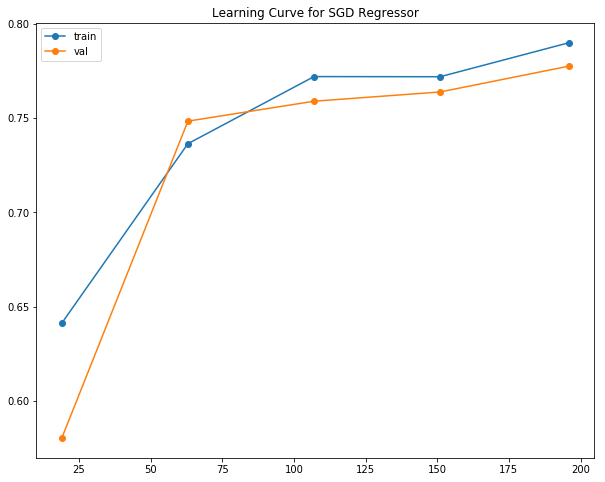

In [34]:
# import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
# plot number of samples vs. mean train scores
ax.plot(train_sizes_abs, np.mean(train_scores, axis=1), label='train',
       marker='o')

# plot number of samples vs. mean val scores
ax.plot(train_sizes_abs, np.mean(val_scores, axis=1), label='val',
       marker='o')

ax.legend()
ax.set_title('Learning Curve for SGD Regressor')
plt.show()

In [24]:
# Prediction (e.g. use model for deployment)
test_input = X_test[:2] # first two values

# pre-process by scaling input
test_input_scaled = X_scaler.transform(test_input)

# predict
pred_scaled = model.predict(test_input_scaled)

# post process by unscaling result from model
pred = y_scaler.inverse_transform(pred_scaled.reshape(-1, 1))
print(pred)

[[26.01796144]
 [26.87051484]]


In [25]:
X_test[:2] 

,cylinders,displacement,horsepower,weight,acceleration,model_year
79,4,96.0,69.0,2189.0,18.0,72
276,4,121.0,115.0,2795.0,15.7,78


In [26]:
y_test[:2]

79     26.0
276    21.6
Name: mpg, dtype: float64